# Dark file subtraction

In [1]:
-

In [2]:
name= "ty"

print (os.path.join("Users/sameera/Desktop/tiff_files/clean_data", name))

Users/sameera/Desktop/tiff_files/clean_data/ty


In [3]:
data_dir = "/Users/sameera/Desktop/tiff_files/new2/"
A = glob.glob(os.path.join(data_dir, "*tiff"))

In [4]:
len(A)

24

In [5]:
#cd "/Users/sameera/Desktop/tiff_files/clean_data/"

In [6]:
clean_data = remove_dark(A, "Users/sameera/Desktop/tiff_files/clean_data/ ")

+++++ bad /Users/sameera/Desktop/tiff_files/new2/2016-02-05_19:59_dark_LaB6.tiff
good /Users/sameera/Desktop/tiff_files/new2/2016-02-05_20:00_LaB6.tiff
+++++ bad /Users/sameera/Desktop/tiff_files/new2/2016-02-05_21:19_dark_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu'].tiff
good /Users/sameera/Desktop/tiff_files/new2/2016-02-05_21:20_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_250.12K.tiff
good /Users/sameera/Desktop/tiff_files/new2/2016-02-05_21:20_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_255.67K.tiff
good /Users/sameera/Desktop/tiff_files/new2/2016-02-05_21:20_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_261.23K.tiff
good /Users/sameera/Desktop/tiff_files/new2/2016-02-05_21:20_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_266.81K.tiff
good /Users/sameera/Desktop/tiff_files/new2/2016-02-05_21:20_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_272.33K.tiff
good /Users/sameera/Desktop/tiff_files/new2/2016-02-05

In [7]:
clean_data.shape[0]

21

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

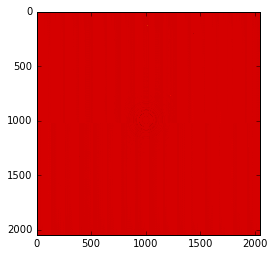

In [9]:
fig = plt.subplot()
plt.imshow(clean_data[5])

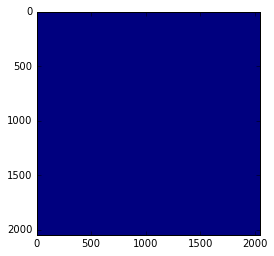

In [10]:
plt.imshow(clean_data[10], vmin=0, vmax=5000)
plt.show()

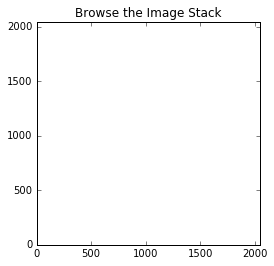

<function __main__.view_image>

In [11]:
from ipywidgets import interact
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import glob

A = glob.glob(os.path.join(data_dir, "*tiff"))
Data = imread(A)

def view_image(i):
    fig, ax = plt.subplots()
    ax.imshow(Data[i], interpolation='nearest', 
                  origin='lower', norm= LogNorm(vmin=0.1, vmax=4000) )
    ax.set_title("Browse the Image Stack")
    plt.show()
    
interact(view_image, i=(0, Data.shape[0]-1))


In [12]:
A[0]

'/Users/sameera/Desktop/tiff_files/new2/2016-02-05_19:59_dark_LaB6.tiff'

In [13]:
yu= imread(A[3])

In [14]:
yu.shape

(2048, 2048)

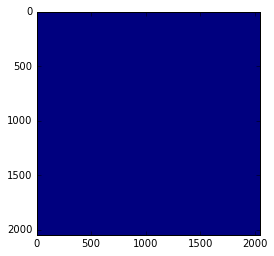

In [15]:
fig = plt.subplot()
plt.imshow(yu, vmin=0.01, vmax=4000)
plt.show()